# Testing the non-Markovian Path Analysis Package
 

In [38]:
from tools_for_notebook import *
%matplotlib inline
from nmpath.auxfunctions import *
from nmpath.mappers import rectilinear_mapper
#from nmpath.mappers import voronoi_mapper

## 2D Toy model

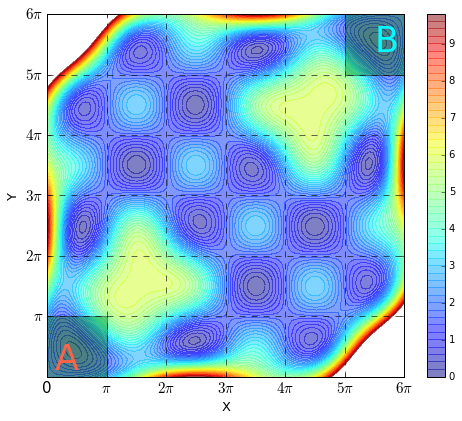

In [39]:
plot_traj([],[])

## MC simulation

In [40]:
#Generating MC trajectories
mc_traj1_2d = mc_simulation2D(100000)
mc_traj2_2d = mc_simulation2D(10000)


## 1 - Ensemble class (analysis of continuos trajectories)

Stores an esemble (list) of trajectories (np.arrays). The ensemble could have any number of trajectories including no trajectories at all.

### Creating an Ensemble

In [41]:
# Empty ensemble with no trajectories
my_ensemble = Ensemble()

From a single trajectory:

In [42]:
# from a single trajectory
my_ensemble = Ensemble(mc_traj1_2d)

From a list of trajectories:

In [43]:
# We have to set list_of_trajs = True

my_list_of_trajs = [mc_traj1_2d, mc_traj2_2d]

my_ensemble = Ensemble(my_list_of_trajs, list_of_trajs = True)

### Ensembles are iterable objects  

In [44]:
for traj in my_ensemble:
    print(len(traj))

100000
10000


### Adding trajectories to the Ensemble
New trajectories can be added to the ensemble as long as there is consistency in the number of variables.

In [45]:
my_ensemble = Ensemble()

my_ensemble.add_trajectory(mc_traj1_2d)

my_ensemble.add_trajectory(mc_traj2_2d)

## "Printing" the ensemble

In [46]:
print(my_ensemble)

Ensemble with 2 (2-dimensional) trajectories 
Total number of snapshots: 110000


### Defining states and computing MFPTs
The states are considered intervals in the is the class is Ensemble

In [47]:
stateA = [[0,pi],[0,pi]]
stateB = [[5*pi,6*pi],[5*pi,6*pi]]

my_ensemble.mfpts(stateA, stateB)

{'mfptAB': 1524.8857142857144,
 'mfptBA': 1552.735294117647,
 'std_err_mfptAB': 227.26394174760523,
 'std_err_mfptBA': 209.21418020453734}

### Sum of ensembles (ensemble + ensemble)

In [48]:
seq1 = mc_simulation2D(20000)
seq2 = mc_simulation2D(20000)

my_e1 = Ensemble(seq1)
my_e2 = Ensemble(seq2)

ensemble1 = my_e1 + my_e2

#### Another simple example

In [49]:
e1 = Ensemble([1,2,3,4])
e2 = Ensemble([2,3,4,5])
e3 = Ensemble([2,1,1,4])

my_ensembles = [e1, e2, e3]

ensemble_tot = Ensemble([])

for ens in my_ensembles:
    ensemble_tot += ens

#ensemble_tot.mfpts([1,1],[4,4])

### Computing the count matrix and transition matrix

In [56]:
n_states = N**2
bin_bounds = [[i*pi for i in range(7)],[i*pi for i in range(7)]]
C1 = my_ensemble._count_matrix(n_states, map_function=rectilinear_mapper(bin_bounds))
print(C1)

[[ 7073.   114.     0. ...,     0.     0.     0.]
 [  110.   710.    73. ...,     0.     0.     0.]
 [    0.    73.  3281. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  3791.    75.     0.]
 [    0.     0.     0. ...,    75.   707.   122.]
 [    0.     0.     0. ...,     0.   133.  6741.]]


In [58]:
K1 = my_ensemble._mle_transition_matrix(n_states, map_function=rectilinear_mapper(bin_bounds))
print(K1)

[[ 0.96520197  0.01555677  0.         ...,  0.          0.          0.        ]
 [ 0.11542497  0.74501574  0.07660021 ...,  0.          0.          0.        ]
 [ 0.          0.01918528  0.86228647 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.86969488  0.01720578  0.        ]
 [ 0.          0.          0.         ...,  0.07780083  0.73340249
   0.12655602]
 [ 0.          0.          0.         ...,  0.          0.0190299
   0.96451567]]


## 2 - PathEnsemble class

### Creating a path ensemble object

In [15]:
#p_ensemble = PathEnsemble()

#### From ensemble

In [16]:
p_ensemble = PathEnsemble.from_ensemble(my_ensemble, stateA, stateB)

print(p_ensemble)

PathEnsemble with 27 (2-dimensional) trajectories 
Total number of snapshots: 50202


### MFPTs

In [17]:
p_ensemble.mfpts(stateA, stateB)

{'mfptAB': 1858.3333333333333,
 'mfptBA': 'NaN',
 'std_err_mfptAB': 336.06410649795504,
 'std_err_mfptBA': 'NaN'}

### Count matrix

In [18]:
print(p_ensemble._count_matrix(n_states, mapping_function2D))

[[ 4807.    92.     0. ...,     0.     0.     0.]
 [   87.   497.    53. ...,     0.     0.     0.]
 [    0.    53.  2092. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  1626.    34.     0.]
 [    0.     0.     0. ...,    20.   179.    10.]
 [    0.     0.     0. ...,     0.     0.     0.]]


In [19]:
#clusters = p_ensemble.cluster(distance_metric = 'RMSD', n_cluster=10, method = 'K-means')


## 3 - DiscreteEnsemble class

We can generate a discrete ensemble from the same mapping function and we should obtain exaclty the same result:

In [20]:
d_ens = DiscreteEnsemble.from_ensemble(my_ensemble, mapping_function2D)

print(d_ens)

DiscreteEnsemble with 2 (1-dimensional) trajectories 
Total number of snapshots: 110000


### Count matrix and transition matrix

In [21]:
C2 = d_ens._count_matrix(n_states)
print(C2)

[[ 4985.    94.     0. ...,     0.     0.     0.]
 [  103.   657.    75. ...,     0.     0.     0.]
 [    0.    85.  4094. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  3789.    82.     0.]
 [    0.     0.     0. ...,    73.   657.    91.]
 [    0.     0.     0. ...,     0.    91.  5286.]]


In [22]:
K2= d_ens._mle_transition_matrix(n_states)
print(K2)

[[ 0.96198379  0.01813971  0.         ...,  0.          0.          0.        ]
 [ 0.11664779  0.74405436  0.08493771 ...,  0.          0.          0.        ]
 [ 0.          0.01815463  0.87441264 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.87003444  0.01882893  0.        ]
 [ 0.          0.          0.         ...,  0.08439306  0.75953757
   0.10520231]
 [ 0.          0.          0.         ...,  0.          0.01665142
   0.96724611]]


### Defining states and computing MFPTs
The states are now considered sets, defining the states as follow we should obtain the same results

In [23]:
stateA = [0]
stateB = [N*N-1]

d_ens.mfpts(stateA, stateB)

{'mfptAB': 1858.3333333333333,
 'mfptBA': 2148.6153846153848,
 'std_err_mfptAB': 336.06410649795504,
 'std_err_mfptBA': 359.70193148984328}

### Generating a Discrete Ensemble from the transition matrix

In [24]:
d_ens2 = DiscreteEnsemble.from_transition_matrix(K2, sim_length = 100000)

In [25]:
#d_ens2.mfpts(stateA,stateB)

## 4 - DiscretePathEnsemble class

### Creating the DPE

#### From Ensemble

In [26]:
dpathEnsemble = DiscretePathEnsemble.from_ensemble(my_ensemble, stateA, stateB, mapping_function2D)
print(dpathEnsemble)

DiscretePathEnsemble with 27 (1-dimensional) trajectories 
Total number of snapshots: 50202


In [27]:
#MFPT from the transition matrix
dpathEnsemble.nm_mfpt(ini_probs = None, n_states = N*N)

1858.3333333333621

#### From the transition matrix

In [28]:
n_paths = 100

dpathEnsemble2 = DiscretePathEnsemble.from_transition_matrix\
                (K2, stateA = stateA, stateB = stateB, n_paths = n_paths,ini_pops = [1])
    
print(dpathEnsemble2)

DiscretePathEnsemble with 100 (1-dimensional) trajectories 
Total number of snapshots: 102343


### Fundamental sequence

In [29]:
FSs = dpathEnsemble2.fundamental_sequences(K2)
size = len(FSs)

paths = dpathEnsemble2.trajectories

### Plotting paths A -> B

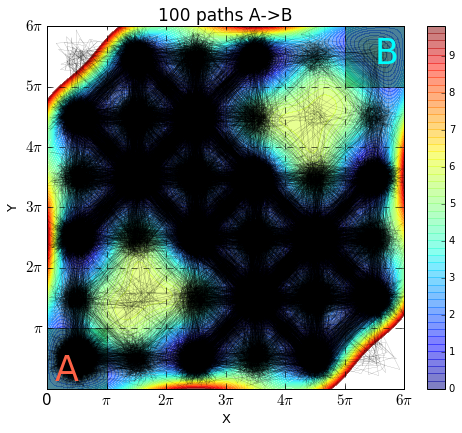

In [30]:
discrete = [True for i in range(size)]

plot_traj([[paths[i],[]] for i in range(size)] , discrete, \
          line_width=0.1, std=0.5, color='k', title = '{} paths A->B'.format(n_paths))

### Plotting Fundamental Sequences A -> B

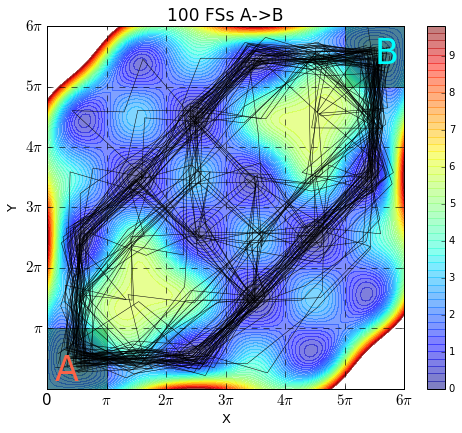

In [31]:
plot_traj([[FSs[i],[]] for i in range(size)] ,discrete, \
          line_width=0.5, std=0.4, color='k', title = '{} FSs A->B'.format(n_paths))

In [32]:
reduced_FSs, weights = dpathEnsemble2.weighted_fundamental_sequences(K2)
new_size = len(weights)
lw = [weights[i]*100 for i in range(new_size)] 

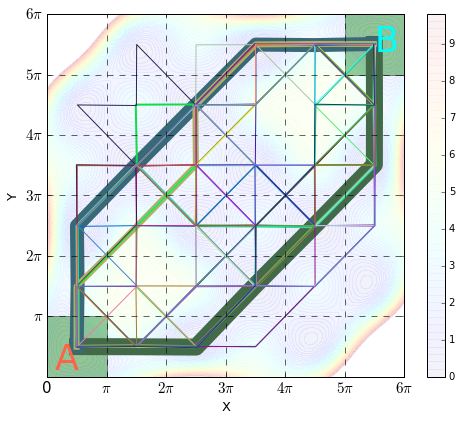

In [33]:
np.random.seed(3)
plot_traj([[reduced_FSs[i],[]] for i in range(new_size)] ,discrete=[True for i in range(new_size)],\
          line_width = lw,std = 0.02, alpha=0.05) 

In [34]:
### for i,w in enumerate(weights):
#     print(w,' ',reduced_FSs[i])

In [35]:
# G = nx.DiGraph()
# G.add_nodes_from(list(range(N*N)))
# max_path = 2
# count = 0
# for path in reduced_FSs:
#     for i in range(len(path)-1):
#         G.add_edge(path[i],path[i+1], weight = 0)
#     count+=1
#     if count >= max_path: break
# nx.draw_random(G,with_labels=True)